In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN

In [61]:
%matplotlib inline

In [62]:
#f = open("/content/drive/My Drive/datos.csv.gsheet")

In [63]:
from pandas import read_csv
from datetime import datetime
#dataset = read_csv('/content/drive/My Drive/datos.csv')

In [64]:
#data = pd.read_csv('/content/drive/My Drive/datos.csv', index_col=0)
data = pd.read_csv("datos.csv", index_col=0)
#data = read_csv('/content/drive/My Drive/SIMULACION/datos.csv.gsheet')


In [65]:
data.index = pd.to_datetime(data.index)
data.columns = ["Voltaje V","Current mA","Temperature C","Carga AH"]
data.index.name = "Fecha"
data.shape

(14966, 4)

In [66]:
data.head(5)

,Voltaje V,Current mA,Temperature C,Carga AH
Fecha,,,,
2019-05-30 17:29:00,13.52,1.50,24.83,0.24000
2019-05-30 17:29:00,13.37,1.51,24.83,0.24080
2019-05-30 17:29:00,13.44,1.52,24.89,0.24160
2019-05-30 17:29:00,13.37,1.54,24.95,0.24280
2019-05-30 17:29:00,13.34,1.54,24.95,0.24352


In [10]:
data.shape

(14966, 4)

In [11]:
data.describe()

,Voltaje V,Current mA,Temperature C,Carga AH
count,14966.000000,14966.000000,14966.000000,14966.000000
mean,12.451717,1.061770,26.439614,0.381742
std,3.942605,0.788146,1.028387,0.077824
min,-0.540000,-0.510000,23.470000,0.018734
25%,11.150000,0.680000,25.790000,0.357145
50%,12.290000,0.770000,26.270000,0.392275
75%,13.710000,1.900000,26.830000,0.426944
max,24.460000,2.150000,28.970000,0.489263


In [12]:
data.dtypes

Voltaje V        float64
Current mA       float64
Temperature C    float64
Carga AH         float64
dtype: object

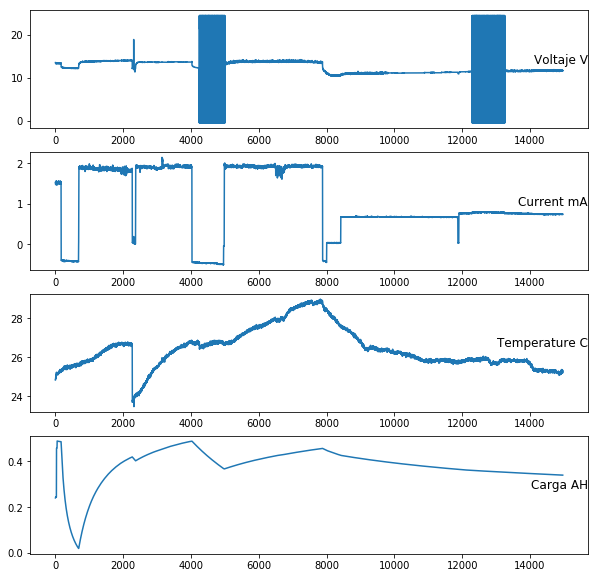

In [13]:
values = data.values

groups = np.arange(0,4,1)
tam = groups.size
plot = 1
plt.figure(figsize=(10,10))
for group in groups:
    plt.subplot(tam, 1, plot)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y =0.5, loc='right')
    plot += 1
plt.show()

In [67]:
data.drop(data.index[4000:5000], inplace=True)
data.drop(data.index[9000:9500], inplace=True)
data.shape

(9622, 4)

In [68]:
y = data.iloc[:,-1]

In [69]:
y.shape

(9622,)

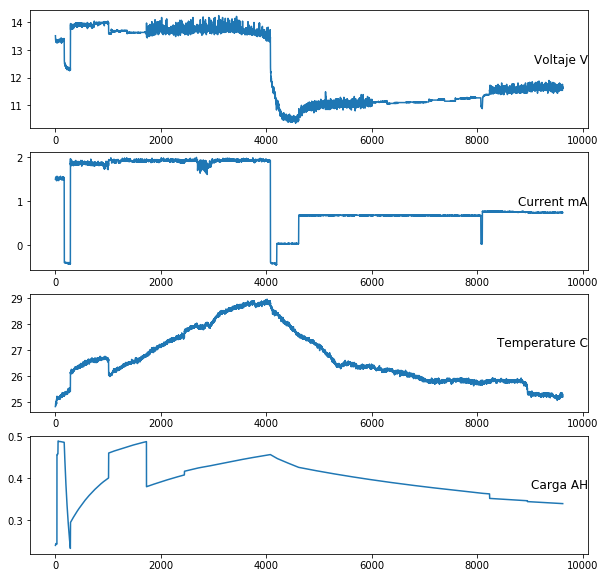

In [17]:
values = data.values

groups = np.arange(0,4,1)
tam = groups.size
plot = 1
plt.figure(figsize=(10,10))
for group in groups:
    plt.subplot(tam, 1, plot)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y =0.5, loc='right')
    plot += 1
plt.show()

In [70]:
dataset = np.array(data)

In [71]:
dataset[0].shape

(4,)

Se crea tres modelos basado en las RNNs convencionales, una LSTM y por último basado en unidades GRU. Se busca hacer comparación del rendimiento de los modelos.

In [194]:
def model_LSTM(X_train, y_train, X_test, y_test, n_steps):
    
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1],4)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam',loss='mse', metrics=['mae', 'acc'])
    

    model.fit(X_train.reshape(X_train.shape[0],n_steps,4),y_train,epochs=2,batch_size=32)

    metricsTrain = model.evaluate(X_train, y_train)
    metricsTest = model.evaluate(X_test,y_test)

    
    return metricsTrain, metricsTest, model

In [199]:
def model_GRU(X_train, y_train, X_test, y_test, n_steps):
    
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1],4)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam',loss='mse', metrics=['mae', 'acc'])
    

    model.fit(X_train.reshape(X_train.shape[0],n_steps,4),y_train,epochs=2,batch_size=32)

    metricsTrain = model.evaluate(X_train, y_train)
    metricsTest = model.evaluate(X_test,y_test)

    
    return metricsTrain, metricsTest, model

In [ ]:
def model_RNN(X_train, y_train, X_test, y_test, n_steps):
    
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1],4)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam',loss='mse', metrics=['mae', 'acc'])
    

    model.fit(X_train.reshape(X_train.shape[0],n_steps,4),y_train,epochs=2,batch_size=32)

    metricsTrain = model.evaluate(X_train, y_train)
    metricsTest = model.evaluate(X_test,y_test)

    
    return metricsTrain, metricsTest, model

In [108]:
def plot_metrics(title, metrics, loop_back):
    x = np.arange(1,loop_back)
    plt.figure(figsize=(15,15))
    plt.suptitle(title, size=16)
    legends = ["Loss","Mean absolute error","Accuracy"]
    plot = 1
    tam =6

    for train,test in metrics:
        plt.subplot(tam, 1, plot)
        plt.plot(x,train, label="Train")
        plt.plot(x, test, 'r', label = "Test")
        plt.title(legends[plot-1]+" train vs test", y = 0.5)
        plt.legend()
        plot+= 1

    plt.show()

In [183]:
def plot_performance(title, models):
    plt.figure(figsize=(15,15))
    plt.suptitle(title, size=16)
    tam = len(models)
    plot = 1
           
    full_dataset = dataset[0:9622,:].copy()
    scaler = MinMaxScaler(feature_range=(0, 1))
    fullN = scaler.fit_transform(full_dataset)
    
           
    for i, model in enumerate(models):
        loop_back = i
        
        #testN = scaler.transform(test)
        full_train, y_train = split_sequence(fullN, loop_back+1)

        full_predicted = model.predict(full_train)
        plt.subplot(tam,1, plot)
        plt.plot(full_predicted, color='blue',label='Predicted', alpha=0.6)
 
        plt.plot(X_train[:,0][:,3], color='violet',label='X_train')
        #plt.plot(fullN[:,0][:,3], color='violet',label='X_train')
        #plt.plot(X_test[:,0][:,3], color='brown', label = 'X_test')
 
        plt.title('Performance using '+str(loop_back+1) + " loop back", y = 0.3)
        plt.xlim(0, 12000)
        #plt.ylim(0, 0.12)
        plt.legend()
      
        plot +=1

    plt.show()

In [123]:
def train_rnn(trainN, testN,loop_back=1):   

    n_features = trainN.shape[1]

    X_train, y_train = split_sequence(trainN, loop_back)
    y_train = y_train[:,3]
    X_test, y_test = split_sequence(testN, loop_back)
    y_test  = y_test[:,3]
    
    print("Xtrain shape: ", X_train.shape)
    print("ytrain: ",y_train.shape)
    print("Steps in: ",loop_back)
    print("RNN")
    metricsTrain, metricsTest,model = model_RNN(X_train, y_train, X_test, y_test, loop_back)
    
    return metricsTrain, metricsTest, model

In [115]:
def train_model(trainN, testN,loop_back, type_model):   

    n_features = trainN.shape[1]

    X_train, y_train = split_sequence(trainN, loop_back)
    y_train = y_train[:,3]
    X_test, y_test = split_sequence(testN, loop_back)
    y_test  = y_test[:,3]
    
    print("Xtrain shape: ", X_train.shape)
    print("ytrain: ",y_train.shape)
    print("Steps in: ",loop_back)
   
    
    if type_model == 1:
        print("RNN")
        metricsTrain, metricsTest,model = model_RNN(X_train, y_train, X_test, y_test, loop_back)
    elif type_model == 2:
        print("LSTM")
        metricsTrain, metricsTest,model = model_LSTM(X_train, y_train, X_test, y_test, loop_back)
    elif type_model == 3:
        print("GRU")
        metricsTrain, metricsTest,model = model_GRU(X_train, y_train, X_test, y_test, loop_back)
        
    
    return metricsTrain, metricsTest, model

In [124]:
def evaluate_loop_back(trainN, testN, type_model):
    lossTest, lossTrain=[], []
    accTest, accTrain = [], []
    mseTest, mseTrain = [], []
    models = []
    for loop_back in np.arange(1,5,1):
        metricsTrain, metricsTest, model = train_model(trainN, testN,loop_back, type_model)
        lossTrain  += [metricsTrain[0]]
        lossTest  += [metricsTest[0]]
        mseTrain  += [metricsTrain[1]]
        mseTest  += [metricsTest[1]]
        accTrain  += [metricsTrain[2]]
        accTest  += [metricsTest[2]]
        models.append(model)
    return [(lossTrain, lossTest), (mseTrain, mseTest), (accTrain, accTest)], models


## Entrenamiento de los modelos RNN, LSTM, GRU

In [ ]:
from DataPreparationRNN import *
from sklearn.preprocessing import MinMaxScaler
look_back=3
#dataset = datasetO.values
dataset = data.astype('float32')
dataset = np.array(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)



## Entrenamiento con RNN

In [125]:
metricsRNN, models = evaluate_loop_back(trainN, testN,1)

Xtrain shape:  (6445, 1, 4)
ytrain:  (6445,)
Steps in:  1
RNN
Epoch 1/2
6445/6445 [==============================] - 15s 2ms/step - loss: 0.0900 - mean_absolute_error: 0.2324 - acc: 1.5516e-04
Epoch 2/2
3175/3175 [==============================] - 1s 169us/step
Xtrain shape:  (6444, 2, 4)
ytrain:  (6444,)
Steps in:  2
RNN
Epoch 1/2
6444/6444 [==============================] - 12s 2ms/step - loss: 0.0315 - mean_absolute_error: 0.1257 - acc: 1.5518e-04
Epoch 2/2
3174/3174 [==============================] - 1s 186us/step
Xtrain shape:  (6443, 3, 4)
ytrain:  (6443,)
Steps in:  3
RNN
Epoch 1/2
6443/6443 [==============================] - 12s 2ms/step - loss: 0.0239 - mean_absolute_error: 0.1109 - acc: 1.5521e-04
Epoch 2/2
3173/3173 [==============================] - 1s 178us/step
Xtrain shape:  (6442, 4, 4)
ytrain:  (6442,)
Steps in:  4
RNN
Epoch 1/2
6442/6442 [==============================] - 15s 2ms/step - loss: 0.0199 - mean_absolute_error: 0.1001 - acc: 1.5523e-04
Epoch 2/2
3172/3172 [

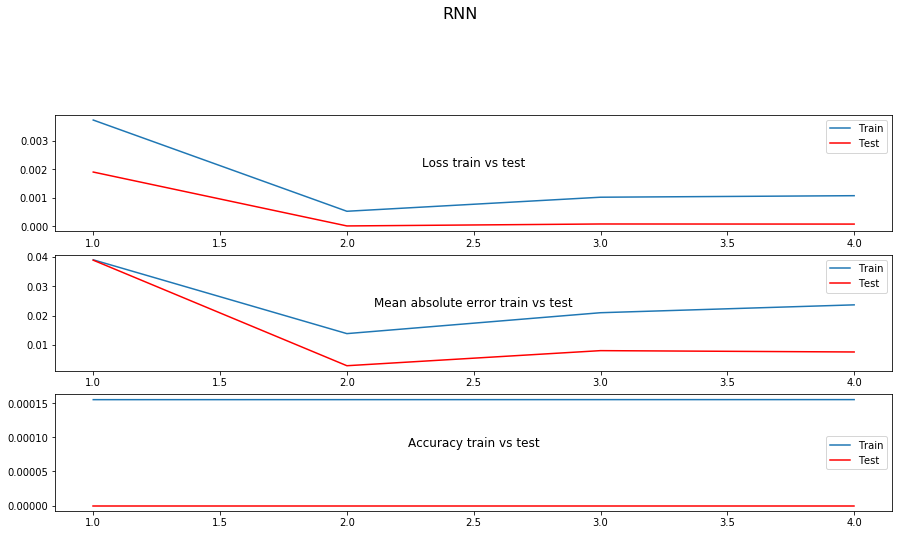

In [126]:
plot_metrics("RNN",metricsRNN,5)

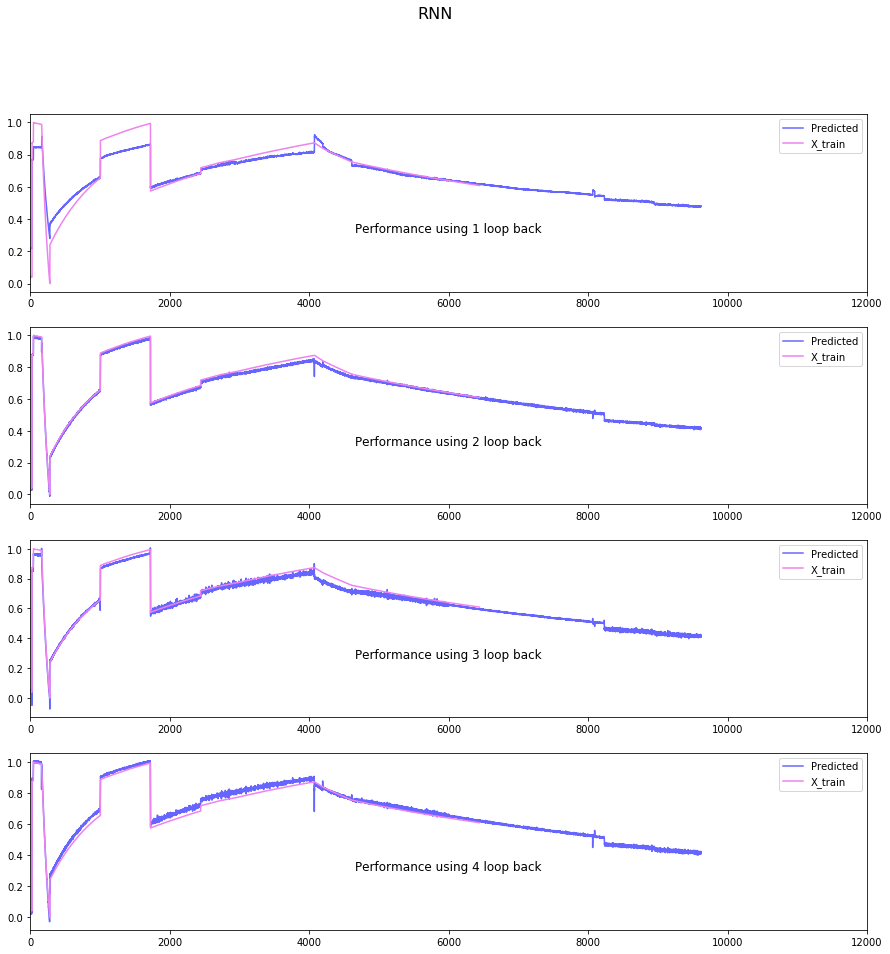

In [184]:
plot_performance("RNN",models)

## Entrenamiento con LSTM

In [195]:
metricsLSTM, modelsLSTM = evaluate_loop_back(trainN, testN,2)

Xtrain shape:  (6445, 1, 4)
ytrain:  (6445,)
Steps in:  1
LSTM
Epoch 1/2
6445/6445 [==============================] - 20s 3ms/step - loss: 0.0835 - mean_absolute_error: 0.2204 - acc: 1.5516e-04
Epoch 2/2
3175/3175 [==============================] - 1s 160us/step
Xtrain shape:  (6444, 2, 4)
ytrain:  (6444,)
Steps in:  2
LSTM
Epoch 1/2
6444/6444 [==============================] - 23s 4ms/step - loss: 0.0495 - mean_absolute_error: 0.1553 - acc: 1.5518e-04
Epoch 2/2
3174/3174 [==============================] - 1s 246us/step
Xtrain shape:  (6443, 3, 4)
ytrain:  (6443,)
Steps in:  3
LSTM
Epoch 1/2
6443/6443 [==============================] - 18s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.1386 - acc: 1.5521e-04
Epoch 2/2
3173/3173 [==============================] - 1s 279us/step
Xtrain shape:  (6442, 4, 4)
ytrain:  (6442,)
Steps in:  4
LSTM
Epoch 1/2
6442/6442 [==============================] - 23s 4ms/step - loss: 0.0657 - mean_absolute_error: 0.1668 - acc: 1.5523e-04
Epoch 2/2
3172/31

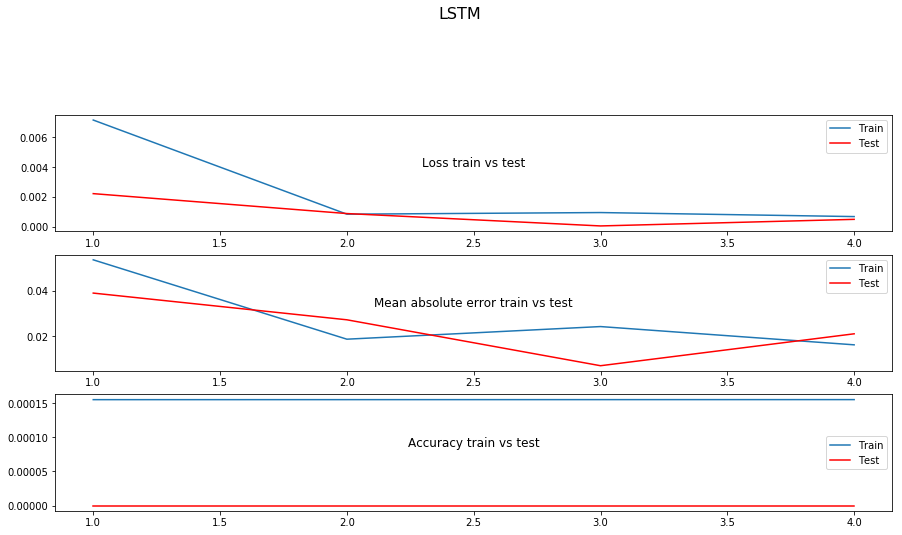

In [196]:
plot_metrics("LSTM",metricsLSTM,5)

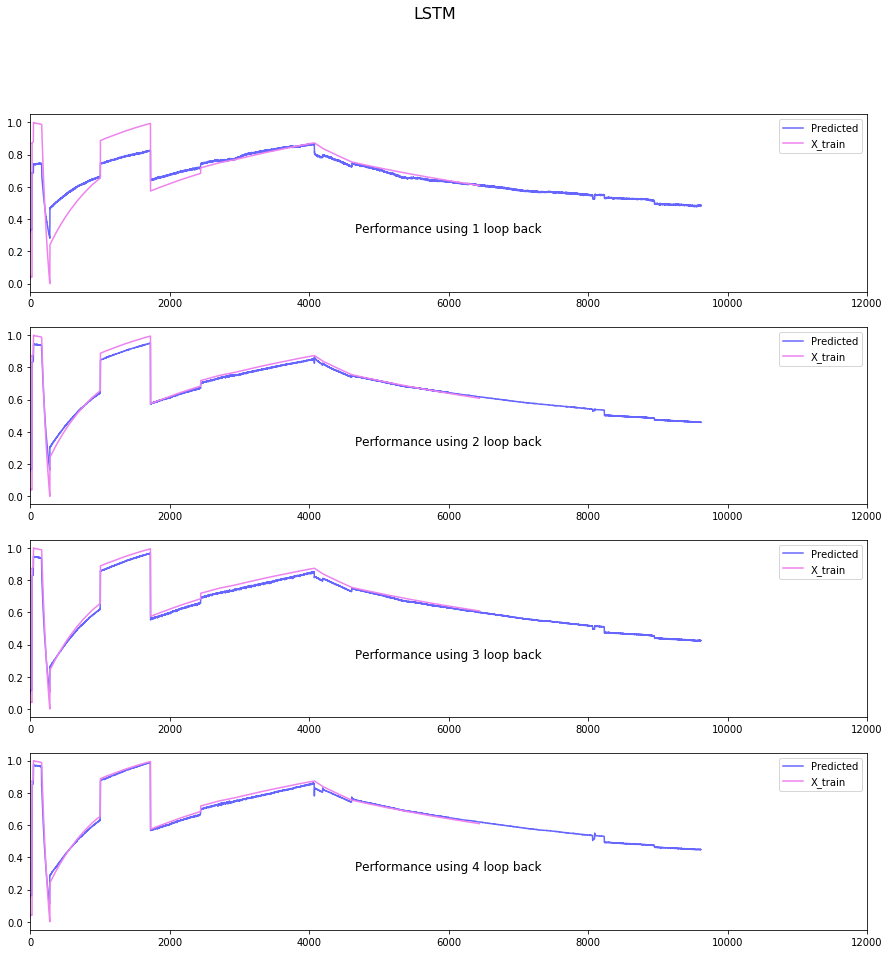

In [197]:
plot_performance("LSTM",modelsLSTM)

## Entrenamiento con GRU

In [200]:
metricsGRU, modelsGRU = evaluate_loop_back(trainN, testN,3)

Xtrain shape:  (6445, 1, 4)
ytrain:  (6445,)
Steps in:  1
GRU
Epoch 1/2
6445/6445 [==============================] - 15s 2ms/step - loss: 0.0152 - mean_absolute_error: 0.0945 - acc: 1.5516e-04
Epoch 2/2
3175/3175 [==============================] - 0s 151us/step
Xtrain shape:  (6444, 2, 4)
ytrain:  (6444,)
Steps in:  2
GRU
Epoch 1/2
6444/6444 [==============================] - 15s 2ms/step - loss: 0.1070 - mean_absolute_error: 0.2106 - acc: 1.5518e-04
Epoch 2/2
3174/3174 [==============================] - 1s 234us/step
Xtrain shape:  (6443, 3, 4)
ytrain:  (6443,)
Steps in:  3
GRU
Epoch 1/2
6443/6443 [==============================] - 15s 2ms/step - loss: 0.0967 - mean_absolute_error: 0.2036 - acc: 1.5521e-04
Epoch 2/2
3173/3173 [==============================] - 1s 226us/step
Xtrain shape:  (6442, 4, 4)
ytrain:  (6442,)
Steps in:  4
GRU
Epoch 1/2
6442/6442 [==============================] - 14s 2ms/step - loss: 0.0945 - mean_absolute_error: 0.2090 - acc: 1.5523e-04
Epoch 2/2
3172/3172 [

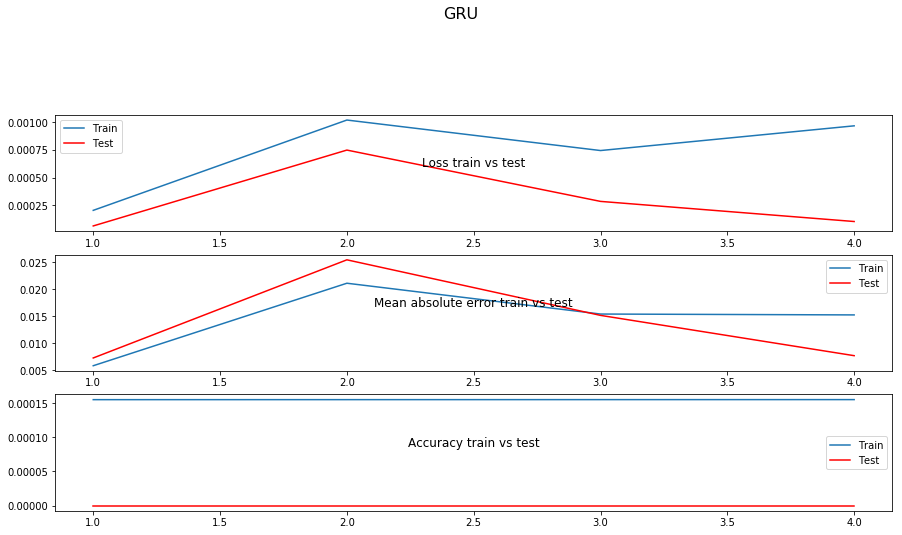

In [201]:
plot_metrics("GRU",metricsGRU,5)

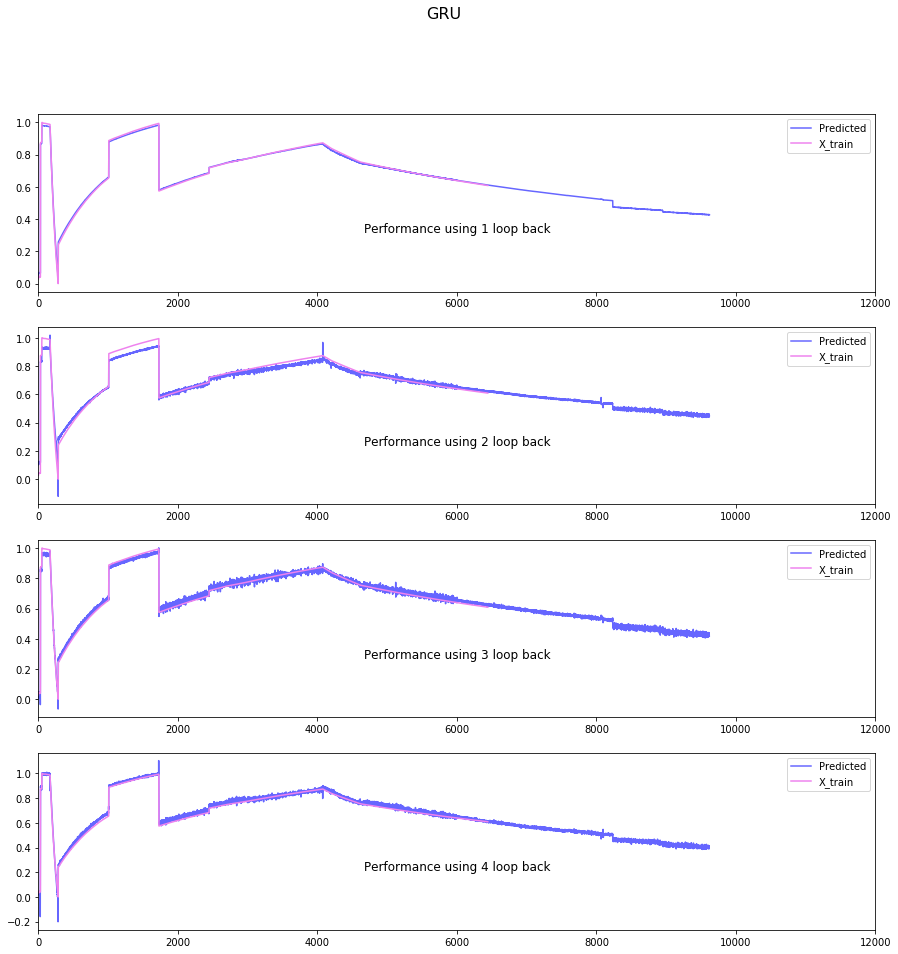

In [202]:
plot_performance("GRU",modelsGRU)

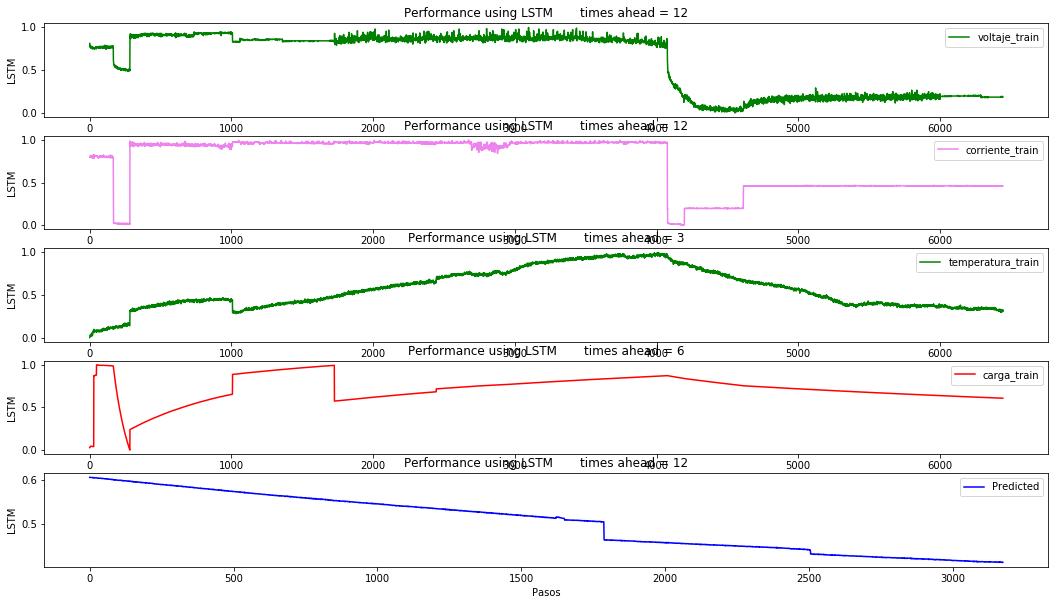

In [18]:

#plt.plot(X_train[:,0][:,2], color='violet',label='X_test')


#plt.style.use('seaborn-white')

plt.figure(figsize=(18,10))   
#x = np.linspace(0,2*pi, 100)

plt.subplot(5,1, 1)

#predicted_stock_price_12 = regressor12.predict(X_test) 
plt.plot(X_train[:,0][:,0], color='green',label='voltaje_train')
#plt.plot(X_test[:,0][:,0], color='red',label='X_test')
plt.title('Performance using LSTM       times ahead = 12')
plt.xlabel('Pasos')
plt.ylabel('LSTM')
#plt.xlim(0, 20)
#plt.ylim(0, 0.12)
plt.legend()

plt.subplot(5,1, 2)

#predicted_stock_price_12 = regressor12.predict(X_test) 
plt.plot(X_train[:,0][:,1], color='violet',label='corriente_train')
#plt.plot(X_test[:,0][:,0], color='red',label='X_test')
plt.title('Performance using LSTM       times ahead = 12')
plt.xlabel('Pasos')
plt.ylabel('LSTM')
#plt.xlim(0, 20)
#plt.ylim(0, 0.12)
plt.legend()


plt.subplot(5,1, 3)

predicted_stock_price_3 = model.predict(X_test) 
plt.plot(X_train[:,0][:,2], color='green',label='temperatura_train')
#plt.plot(X_test[:,0][:,0], color='red',label='X_test')
plt.title('Performance using LSTM       times ahead = 3')
plt.xlabel('Pasos')
plt.ylabel('LSTM')
#plt.xlim(0, 20)
#plt.ylim(0, 0.12)
plt.legend()

plt.subplot(5,1, 4)

#predicted_stock_price_6 = regressor6.predict(X_test) 
plt.plot(X_train[:,0][:,3], color='red',label='carga_train')
#plt.plot(X_test[:,0][:,0], color='red',label='X_test')
plt.title('Performance using LSTM       times ahead = 6')
plt.xlabel('Pasos')
plt.ylabel('LSTM')
#plt.xlim(0, 20)
#plt.ylim(0, 0.12)
plt.legend()

plt.subplot(5,1, 5)

#predicted_stock_price_12 = regressor12.predict(X_test) 
#plt.plot(X_train[:,0][:,1], color='green',label='Temperatura_train')
plt.plot(predicted_stock_pricernn, color='blue',label='Predicted')
##plt.plot(X_test[:,0][:,0], color='red',label='X_test')
plt.title('Performance using LSTM       times ahead = 12')
plt.xlabel('Pasos')
plt.ylabel('LSTM')
#plt.xlim(0, 20)
#plt.ylim(0, 0.12)
plt.legend()


plt.show()